# EDA

In [1]:
import pandas as pd
import numpy as np
import os
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, MinMaxScaler

In [2]:
data = pd.read_csv('data/cleaned.csv')
data.describe()

CookTime      PrepTime     TotalTime  AggregatedRating  \
count  86458.000000  86458.000000  86458.000000      86458.000000   
mean       0.837370      0.372151      1.209567          4.620174   
std        1.973635      2.249506      3.032818          0.632452   
min        0.017000      0.000000      0.017000          1.000000   
25%        0.233000      0.167000      0.417000          4.500000   
50%        0.417000      0.250000      0.667000          5.000000   
75%        0.750000      0.333000      1.083000          5.000000   
max       60.000000    400.000000    400.050000          5.000000   

        ReviewCount      Calories    FatContent  SaturatedFatContent  \
count  86458.000000  86458.000000  86458.000000         86458.000000   
mean       5.302043    302.318730     15.167887             5.841060   
std       19.153153    161.702058     12.083683             5.638979   
min        1.000000      0.000000      0.000000             0.000000   
25%        1.000000    182.400000      5.900000             1.400000   
50%        2.000000    284.000000     12.500000             4.200000   
75%        5.000000    402.400000     21.700000             8.600000   
max     2273.000000    993.600000     69.900000            29.900000   

       CholesterolContent  SodiumContent  CarbohydrateContent  FiberContent  \
count        86458.000000   86458.000000         86458.000000  86458.000000   
mean            64.449040     481.395569            26.593687      2.858329   
std             66.631869     408.964527            17.930343      2.558859   
min              0.000000       0.000000             0.000000      0.000000   
25%              7.400000     156.700000            11.200000      1.000000   
50%             51.400000     381.750000            24.100000      2.200000   
75%             95.900000     701.400000            39.700000      4.000000   
max            399.900000    1999.700000            69.900000     14.900000   

       SugarContent  ProteinContent  RecipeServings  
count  86458.000000    86458.000000    86458.000000  
mean       8.186953       15.199128        5.353189  
std       10.119700       12.063829        2.151397  
min        0.000000        0.000000        1.000000  
25%        2.000000        4.800000        4.000000  
50%        4.300000       11.500000        5.000000  
75%        9.700000       25.100000        6.000000  
max       67.500000       44.900000       11.000000

In [3]:
data.head()

Name  CookTime  PrepTime  TotalTime  \
0           Low-Fat Berry Blue Frozen Dessert    24.000     0.750     24.750   
1                                Cabbage Soup     0.500     0.333      0.833   
2                        Best Blackbottom Pie     2.000     0.333      2.333   
3  Buttermilk Pie With Gingersnap Crumb Crust     0.833     0.500      1.333   
4                                    Chai Tea     0.417     0.250      0.667   

  DatePublished   RecipeCategory  AggregatedRating  ReviewCount  Calories  \
0    1999-08-09  Frozen Desserts               4.5          4.0     170.9   
1    1999-09-19        Vegetable               4.5         11.0     103.6   
2    1999-08-21              Pie               1.0          1.0     437.9   
3    1999-08-06              Pie               4.0          3.0     228.0   
4    1999-08-16        Beverages               3.0          1.0      69.2   

   FatContent  SaturatedFatContent  CholesterolContent  SodiumContent  \
0         2.5                  1.3                 8.0           29.8   
1         0.4                  0.1                 0.0          959.3   
2        19.3                 10.9                94.3          267.6   
3         7.1                  1.7                24.5          281.8   
4         3.8                  2.1                12.8           53.2   

   CarbohydrateContent  FiberContent  SugarContent  ProteinContent  \
0                 37.1           3.6          30.2             3.2   
1                 25.1           4.8          17.7             4.3   
2                 58.0           1.8          42.5             7.0   
3                 37.5           0.5          24.7             4.2   
4                  6.0           0.7           0.0             3.5   

   RecipeServings  
0             4.0  
1             4.0  
2             8.0  
3             8.0  
4             4.0

In [4]:
#Set index as name
data = data.set_index('Name')

In [13]:
data.SodiumContent = data.SodiumContent/1000

In [21]:
data.CholesterolContent = data.CholesterolContent/1000

## Scaling


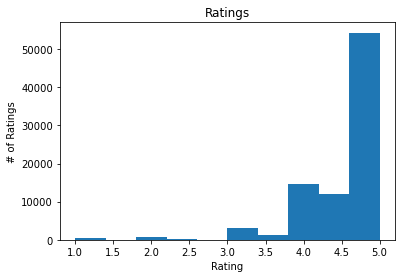

In [14]:
# Making a histogram of the quality variable.
_=plt.hist(data.AggregatedRating, bins=10)
_=plt.xlabel('Rating')
_=plt.ylabel('# of Ratings')
_=plt.title('Ratings')

In [15]:
data.AggregatedRating.value_counts()

5.0    54285
4.0    14564
4.5    11975
3.0     3035
3.5     1300
2.0      619
1.0      465
2.5      202
1.5       13
Name: AggregatedRating, dtype: int64

In [16]:
data.corr()

CookTime  PrepTime  TotalTime  AggregatedRating  \
CookTime             1.000000  0.027212   0.670914         -0.021739   
PrepTime             0.027212  1.000000   0.759433         -0.000144   
TotalTime            0.670914  0.759433   1.000000         -0.014214   
AggregatedRating    -0.021739 -0.000144  -0.014214          1.000000   
ReviewCount          0.009519 -0.001260   0.005252          0.079803   
Calories             0.031943  0.022187   0.037237          0.000614   
FatContent           0.013575  0.023387   0.026166          0.027432   
SaturatedFatContent  0.011008  0.013828   0.017409          0.027233   
CholesterolContent   0.001636  0.010992   0.009267          0.004742   
SodiumContent        0.037733  0.010309   0.032174          0.001723   
CarbohydrateContent  0.014926 -0.001012   0.008979         -0.028457   
FiberContent         0.034971 -0.000345   0.022475         -0.015774   
SugarContent         0.052923  0.009919   0.041851          0.002005   
ProteinContent       0.048514  0.018064   0.044954         -0.017597   
RecipeServings       0.147884  0.040488   0.126259         -0.005382   

                     ReviewCount  Calories  FatContent  SaturatedFatContent  \
CookTime                0.009519  0.031943    0.013575             0.011008   
PrepTime               -0.001260  0.022187    0.023387             0.013828   
TotalTime               0.005252  0.037237    0.026166             0.017409   
AggregatedRating        0.079803  0.000614    0.027432             0.027233   
ReviewCount             1.000000  0.002491    0.001091             0.009792   
Calories                0.002491  1.000000    0.857678             0.739985   
FatContent              0.001091  0.857678    1.000000             0.864615   
SaturatedFatContent     0.009792  0.739985    0.864615             1.000000   
CholesterolContent      0.012974  0.527722    0.526719             0.540867   
SodiumContent           0.026315  0.457316    0.362548             0.302718   
CarbohydrateContent    -0.007864  0.502606    0.107989             0.121853   
FiberContent           -0.025346  0.216515    0.024840            -0.044898   
SugarContent           -0.008825  0.144894   -0.009555             0.034845   
ProteinContent          0.016058  0.637381    0.464957             0.354288   
RecipeServings          0.009263 -0.020766   -0.011970             0.042806   

                     CholesterolContent  SodiumContent  CarbohydrateContent  \
CookTime                       0.001636       0.037733             0.014926   
PrepTime                       0.010992       0.010309            -0.001012   
TotalTime                      0.009267       0.032174             0.008979   
AggregatedRating               0.004742       0.001723            -0.028457   
ReviewCount                    0.012974       0.026315            -0.007864   
Calories                       0.527722       0.457316             0.502606   
FatContent                     0.526719       0.362548             0.107989   
SaturatedFatContent            0.540867       0.302718             0.121853   
CholesterolContent             1.000000       0.292877            -0.037844   
SodiumContent                  0.292877       1.000000             0.159431   
CarbohydrateContent           -0.037844       0.159431             1.000000   
FiberContent                  -0.180064       0.126199             0.494505   
SugarContent                  -0.057998      -0.118409             0.502650   
ProteinContent                 0.585169       0.464172             0.010809   
RecipeServings                -0.055540      -0.040332             0.084132   

                     FiberContent  SugarContent  ProteinContent  \
CookTime                 0.034971      0.052923        0.048514   
PrepTime                -0.000345      0.009919        0.018064   
TotalTime                0.022475      0.041851        0.044954   
AggregatedRating        -0.015774      0.002005       -0.017597   
Rev

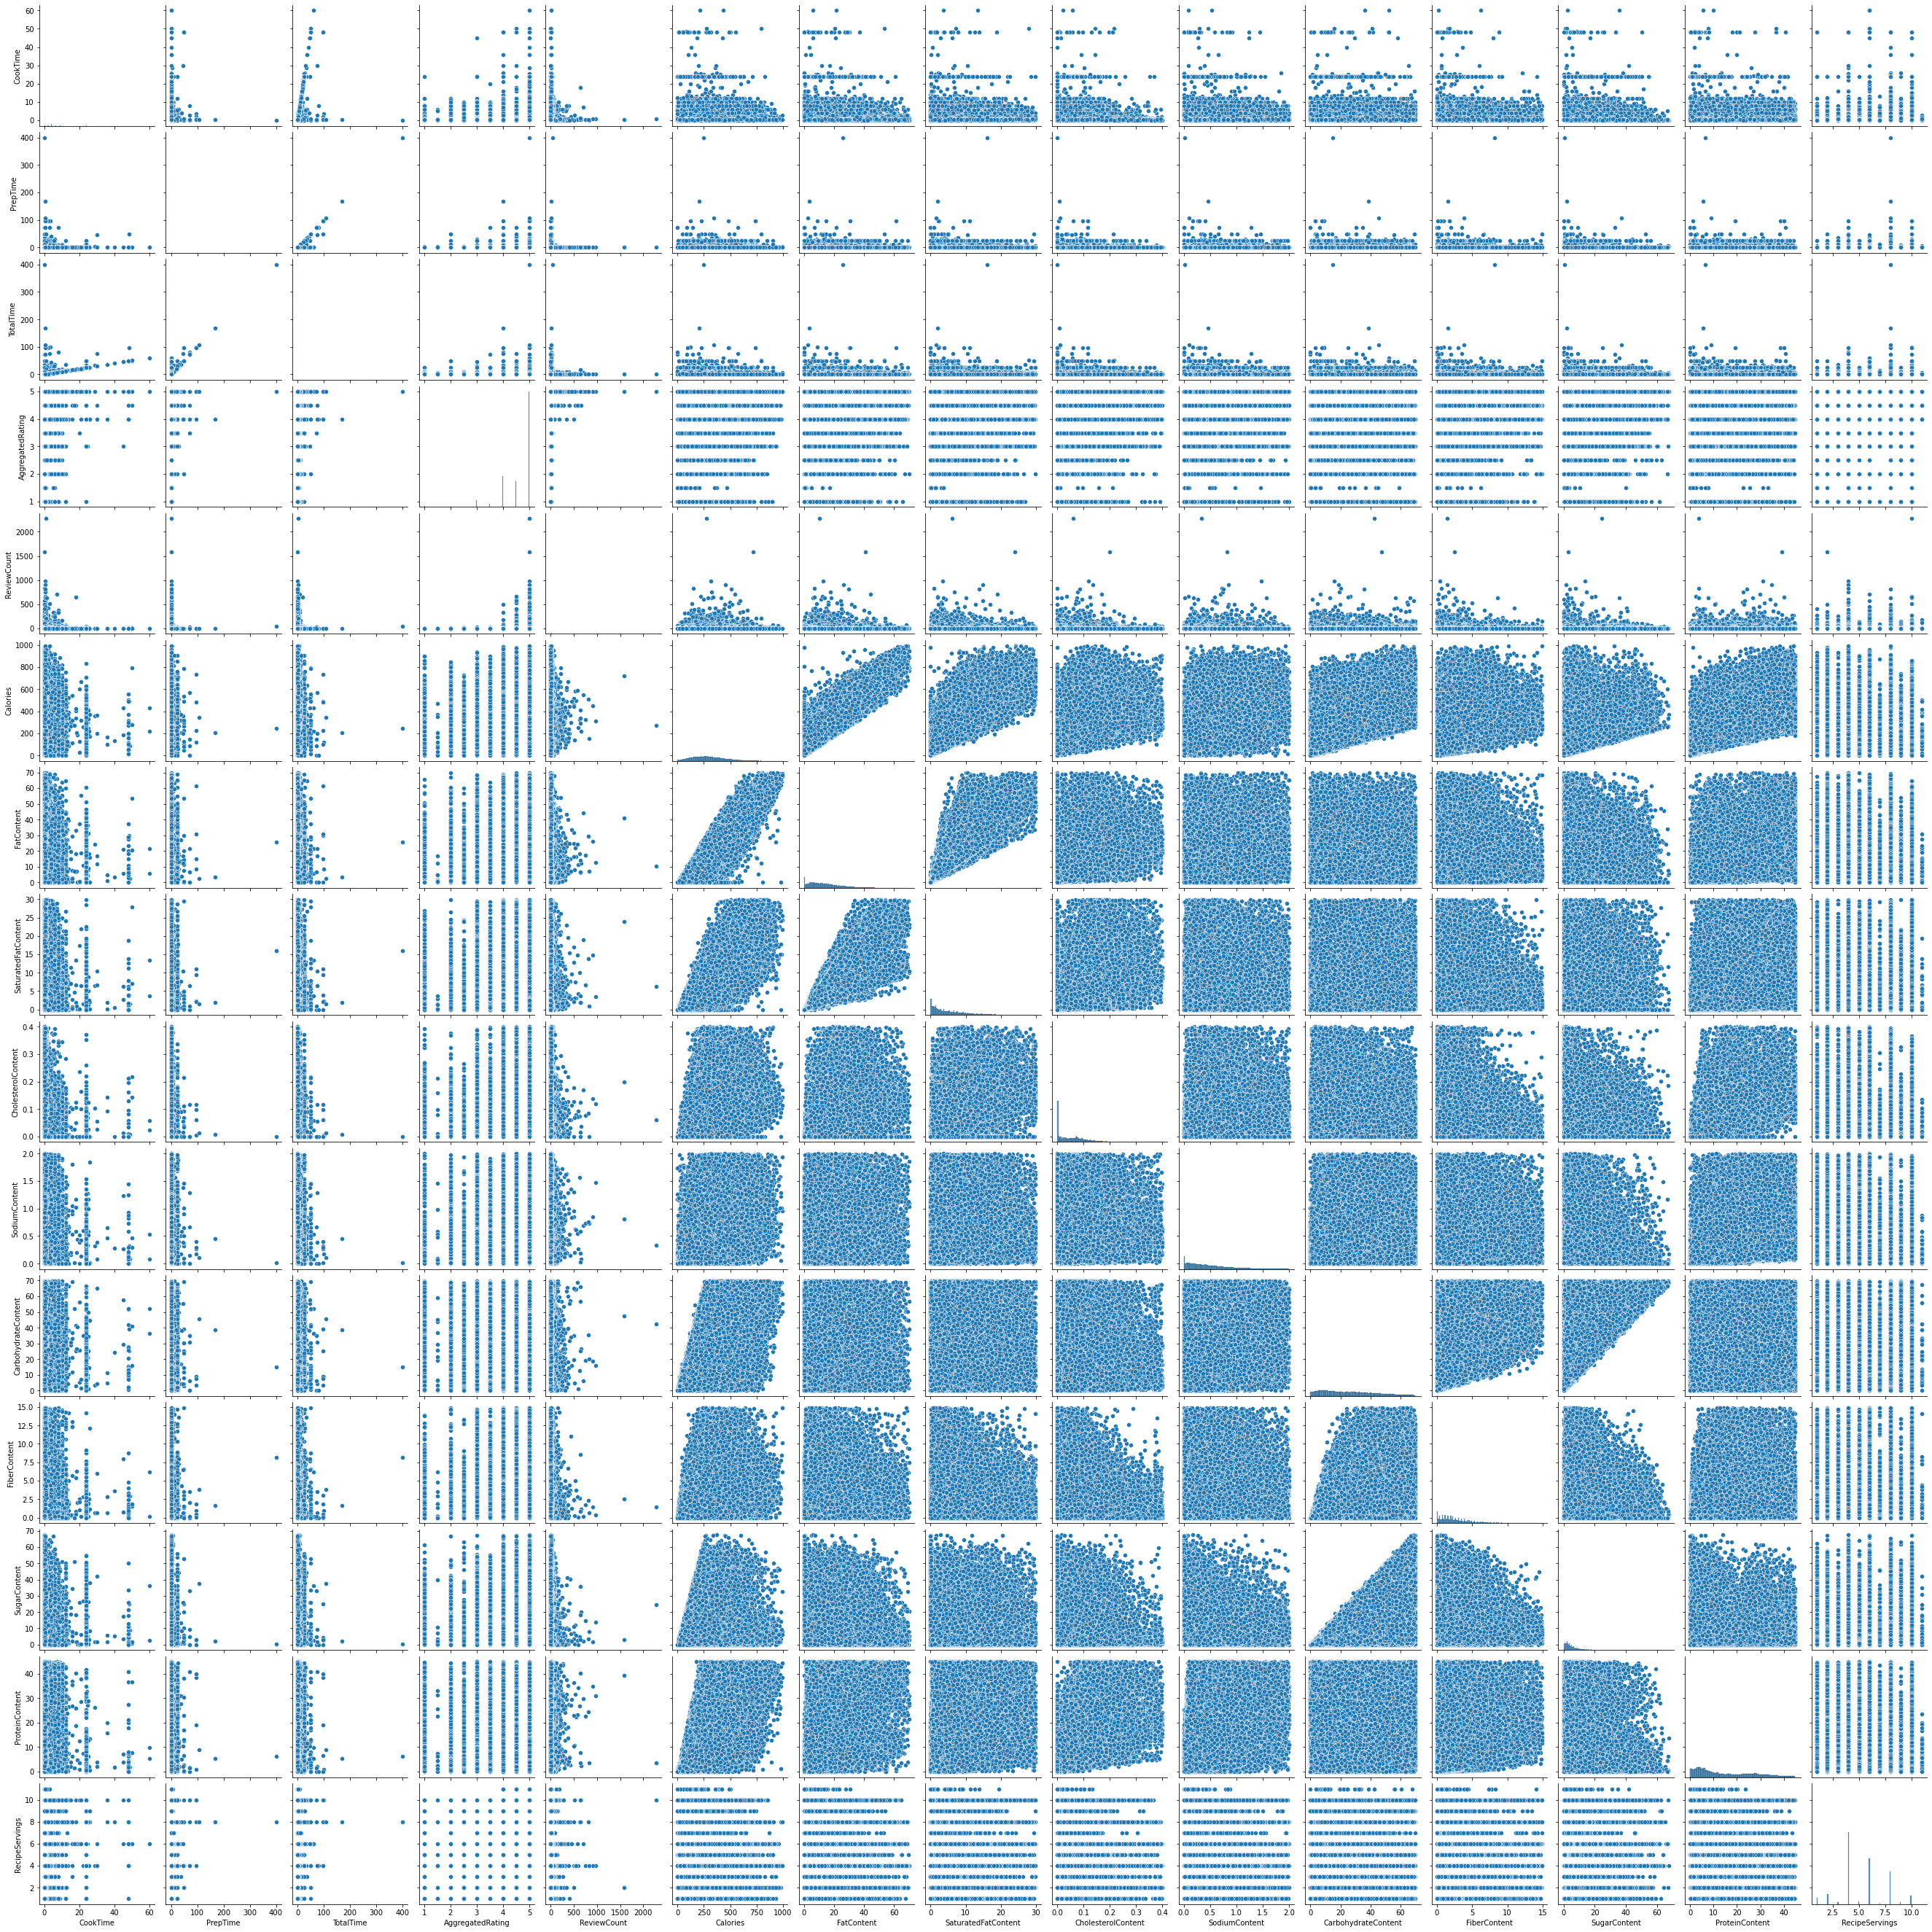

In [23]:
_=sns.pairplot(data)

### Observations
- some outliers for nutritional info
- 

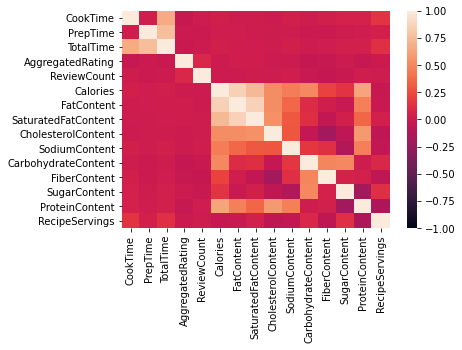

In [17]:
_=sns.heatmap(data.corr(), vmin=-1)

In [18]:
#Save the state labels (using the index and columns attribute of our data) 
data_index = data.index
data_columns = set(data.columns) - set(['DatePublished','RecipeCategory'])

#
data_numeric = data.drop(columns=['DatePublished','RecipeCategory'], axis=1)
data_scale = scale(data_numeric)

#
data_scaled_df = pd.DataFrame(data_scale, columns=data_columns)
data_scaled_df.corr()

FatContent  ProteinContent  FiberContent  \
FatContent             1.000000        0.027212      0.670914   
ProteinContent         0.027212        1.000000      0.759433   
FiberContent           0.670914        0.759433      1.000000   
CarbohydrateContent   -0.021739       -0.000144     -0.014214   
TotalTime              0.009519       -0.001260      0.005252   
ReviewCount            0.031943        0.022187      0.037237   
Calories               0.013575        0.023387      0.026166   
CookTime               0.011008        0.013828      0.017409   
AggregatedRating       0.001636        0.010992      0.009267   
CholesterolContent     0.037733        0.010309      0.032174   
SaturatedFatContent    0.014926       -0.001012      0.008979   
SodiumContent          0.034971       -0.000345      0.022475   
RecipeServings         0.052923        0.009919      0.041851   
SugarContent           0.048514        0.018064      0.044954   
PrepTime               0.147884        0.040488      0.126259   

                     CarbohydrateContent  TotalTime  ReviewCount  Calories  \
FatContent                     -0.021739   0.009519     0.031943  0.013575   
ProteinContent                 -0.000144  -0.001260     0.022187  0.023387   
FiberContent                   -0.014214   0.005252     0.037237  0.026166   
CarbohydrateContent             1.000000   0.079803     0.000614  0.027432   
TotalTime                       0.079803   1.000000     0.002491  0.001091   
ReviewCount                     0.000614   0.002491     1.000000  0.857678   
Calories                        0.027432   0.001091     0.857678  1.000000   
CookTime                        0.027233   0.009792     0.739985  0.864615   
AggregatedRating                0.004742   0.012974     0.527722  0.526719   
CholesterolContent              0.001723   0.026315     0.457316  0.362548   
SaturatedFatContent            -0.028457  -0.007864     0.502606  0.107989   
SodiumContent                  -0.015774  -0.025346     0.216515  0.024840   
RecipeServings                  0.002005  -0.008825     0.144894 -0.009555   
SugarContent                   -0.017597   0.016058     0.637381  0.464957   
PrepTime                       -0.005382   0.009263    -0.020766 -0.011970   

                     CookTime  AggregatedRating  CholesterolContent  \
FatContent           0.011008          0.001636            0.037733   
ProteinContent       0.013828          0.010992            0.010309   
FiberContent         0.017409          0.009267            0.032174   
CarbohydrateContent  0.027233          0.004742            0.001723   
TotalTime            0.009792          0.012974            0.026315   
ReviewCount          0.739985          0.527722            0.457316   
Calories             0.864615          0.526719            0.362548   
CookTime             1.000000          0.540867            0.302718   
AggregatedRating     0.540867          1.000000            0.292877   
CholesterolContent   0.302718          0.292877            1.000000   
SaturatedFatContent  0.121853         -0.037844            0.159431   
SodiumContent       -0.044898         -0.180064            0.126199   
RecipeServings       0.034845         -0.057998           -0.118409   
SugarContent         0.354288          0.585169            0.464172   
PrepTime             0.042806         -0.055540           -0.040332   

                     SaturatedFatContent  SodiumContent  RecipeServings  \
FatContent                      0.014926       0.034971        0.052923   
ProteinContent                 -0.001012      -0.000345        0.009919   
FiberContent                    0.008979       0.022475        0.041851   
CarbohydrateContent            -0.028457      -0.015774        0.002005   
TotalTime                      -0.007864      -0.025346       -0.008825   
ReviewCount                     0.502606       0.216515        0.144894   
Calories                        0.107989       0.024840       -0.0095

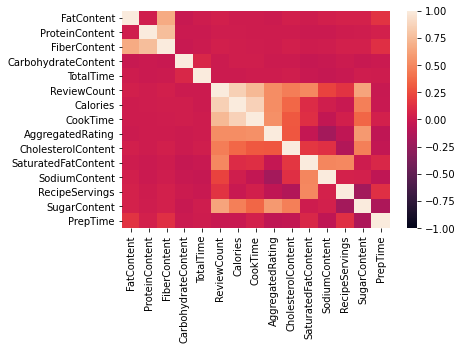

In [19]:
_=sns.heatmap(data_scaled_df.corr(), vmin=-1)

In [20]:
data.mean()

CookTime                 0.837370
PrepTime                 0.372151
TotalTime                1.209567
AggregatedRating         4.620174
ReviewCount              5.302043
Calories               302.318730
FatContent              15.167887
SaturatedFatContent      5.841060
CholesterolContent      64.449040
SodiumContent            0.481396
CarbohydrateContent     26.593687
FiberContent             2.858329
SugarContent             8.186953
ProteinContent          15.199128
RecipeServings           5.353189
dtype: float64